In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import networkx as nx

Matplotlib is building the font cache; this may take a moment.


## Load dataset
#### Chocolate Imports into South Africa: 2010 - 2017

#### I got this dataset from 'Open Up' which stores interesting datasets from South Africa
#### Reference: https://data.openup.org.za/dataset/chocolate-imports-into-south-africa-2010-2017-qccd-zgyb

In [4]:

chocolate_df = pd.read_csv("chocolate.csv", encoding='unicode_escape')
chocolate_df.head()

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,DBN,Durban,IE,Ireland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,Imports,CTN,Cape Town,CH,Switzerland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA


In [5]:
chocolate_df.describe()

,tariff,transportcode,yearmonth,calendaryear,statisticalquantity,customsvalue
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,18062010.0,1.707000,201237.516000,2012.311000,11982.813820,4.595701e+05
std,0.0,1.466049,161.509006,1.620156,30331.838152,1.193868e+06
min,18062010.0,0.000000,201001.000000,2010.000000,0.010000,2.000000e+00
25%,18062010.0,1.000000,201107.000000,2011.000000,59.625000,3.317000e+03
50%,18062010.0,1.000000,201210.000000,2012.000000,1049.750000,4.507850e+04
75%,18062010.0,3.000000,201402.000000,2014.000000,7053.775000,2.824558e+05
max,18062010.0,4.000000,201508.000000,2015.000000,253600.000000,1.208207e+07


#### tradetype and countryofdestination column only have one value='imports' and 'za', serves no purpose in keeping them as columns

In [6]:
chocolate_df.drop(columns='tradetype', axis=1, inplace=True)
chocolate_df.drop(columns='countryofdestination', axis=1, inplace=True)
chocolate_df

,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,DBN,Durban,IE,Ireland,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,DBN,Durban,BE,Belgium,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,DBN,Durban,BE,Belgium,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,CTN,Cape Town,CH,Switzerland,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,CTN,Cape Town,BR,Brazil,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,OSH,Oshoek,SZ,Swaziland,South Africa,18062010,KG,3,Road,201410,2014,18062010 - Chocolate and sugar confectionery c...,0.75,54,AFRICA
996,KFN,Kopfontein,BW,Botswana,South Africa,18062010,KG,3,Road,201410,2014,18062010 - Chocolate and sugar confectionery c...,2560.00,109381,AFRICA
997,CTN,Cape Town,BE,Belgium,South Africa,18062010,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,51840.00,2328328,EUROPE
998,CTN,Cape Town,BR,Brazil,South Africa,18062010,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,3504.00,77426,AMERICA


## Cleaning data
#### Lets identify presence of missing and/or null values within the data set

In [5]:
chocolate_df.isnull().sum()

districtofficecode           0
districtofficename           0
countryoforigin             11
countryoforiginname          0
countryofdestinationname     0
tariff                       0
statisticalunit              0
transportcode                0
transportcodedescription     0
yearmonth                    0
calendaryear                 0
tariffanddescription         0
statisticalquantity          0
customsvalue                 0
worldregion                  0
dtype: int64

#### 'Countryoforigin' is the only column with null values, before we try and address this, lets check if there are any other
#### missing values in the data set that are stored as zeros or some other symbol

In [6]:
(chocolate_df == 0).sum()

districtofficecode            0
districtofficename            0
countryoforigin               0
countryoforiginname           0
countryofdestinationname      0
tariff                        0
statisticalunit               0
transportcode               202
transportcodedescription      0
yearmonth                     0
calendaryear                  0
tariffanddescription          0
statisticalquantity           0
customsvalue                  0
worldregion                   0
dtype: int64

In [7]:
chocolate_df['transportcode'].value_counts()

1    448
4    209
0    202
3    141
Name: transportcode, dtype: int64

#### We see that transportcode has 202 zeros, however these seem to represent actual data instead of missing value (4 types of int values within the  column, 1, 4, 0 and 3). Therefore we can focus on addressing the 11 null values in countryoforigin column. We can address these by imputation instead of dropping columns. We want to avoid losing data found in the other columns that do not have null values therefore we will use the most frequent value found in the column, and impute that value to the missing values

#### most frequent value is BE

In [8]:
chocolate_df['countryoforigin'].value_counts().head(15) 

BE    137
CH    113
SG     72
IT     66
LS     54
GB     53
FR     47
US     46
BW     44
BR     35
PL     35
SZ     34
NL     27
DE     27
ES     27
Name: countryoforigin, dtype: int64

In [9]:
chocolate_df['countryoforigin'].fillna('BE', inplace=True)
chocolate_df['countryoforigin'].value_counts().head(15) 

BE    148
CH    113
SG     72
IT     66
LS     54
GB     53
FR     47
US     46
BW     44
BR     35
PL     35
SZ     34
NL     27
DE     27
ES     27
Name: countryoforigin, dtype: int64

#### 'BE' has increased by 11 to 148 from 137 indicating that all missing values have been filled 

### Drop additional columns
#### Earlier on we dropped columns that only had one value but are all the remaining columns necessary?
#### Lets remove columns that are not necessary within the dataset. E.g districtofficecode and districtofficename provide the same information, districtofficecode simply gives the abbreviated version of the values found indistrictofficename. 

In [10]:
chocolate_df.drop(columns=['tariff', 'districtofficecode', 'countryoforigin','countryofdestinationname'], inplace=True)
chocolate_df.head()

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Durban,Ireland,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,Cape Town,Switzerland,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,Cape Town,Brazil,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA


In [11]:
chocolate_df['yearmonth'].head()

0    201001
1    201003
2    201001
3    201001
4    201001
Name: yearmonth, dtype: int64

## Visualise data


#### We want to first get an idea of all the world regions where imports come from as well as the count for these regions. An easy way of doing this is to use a bar chart/bar graph to visualise the world regions and the count or frequency at which they appear in the dataset. This is important because it enables us to clearly view which world region provides South Africa with the most chocolate. From there on we can zoom in and focus on specific countries.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

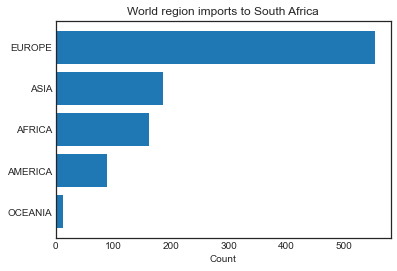

In [12]:
#We first get the labels from the worldregion column 
y = chocolate_df['worldregion'].value_counts()
y_label = chocolate_df['worldregion'].value_counts().index

#We then get the position for the labels that will be used in the graph
#We also get the int values (in this case the counts) for the world regions by
#looping through y which contained the counts for the world regions
#We then store the values in a list made up of ints
y_position = np.arange(len(y_label))

counts = []
for values in y:
    counts.append(values)

#REFERENCE FOR BAR CHART: https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
fig, ax = plt.subplots()
hbars = ax.barh(y_position, counts, align='center')

#use labels (barChartLabels) as yticks
ax.set_yticks(y_position)
ax.set_yticklabels(y_label)
ax.invert_yaxis()
ax.set_xlabel('Count') 
ax.set_title('World region imports to South Africa')

#determine length of x-axes and bar height
ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=700)  

plt.show()

#### We notice that Europe has the highest import count (55.3%) and the lowest comes from Oceania (1.2%). However how does this translate when we zoom in on the actual countries present in these regions? Are imports in Europe centred on a few countries or distributed throughout different European countries? Lets find out

In [13]:
#Let group the dataset according to world regions
chocolate_df_grouped = chocolate_df.groupby('worldregion')
#Lets get a specific world region, specifically Europe
chocolate_df_europe = chocolate_df_grouped.get_group('EUROPE')
chocolate_df_europe

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Durban,Ireland,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.7,94453,EUROPE
1,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.0,2042006,EUROPE
2,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.0,724672,EUROPE
3,Cape Town,Switzerland,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.0,1253110,EUROPE
5,Durban,Switzerland,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,1615.0,92143,EUROPE
...,...,...,...,...,...,...,...,...,...,...,...
990,O.R. Tambo Int Airport,Belgium,KG,4,Air,201410,2014,18062010 - Chocolate and sugar confectionery c...,2100.0,130241,EUROPE
991,O.R. Tambo Int Airport,United Kingdom,KG,4,Air,201410,2014,18062010 - Chocolate and sugar confectionery c...,3.0,56,EUROPE
992,O.R. Tambo Int Airport,Italy,KG,4,Air,201410,2014,18062010 - Chocolate and sugar confectionery c...,242.0,44380,EUROPE
997,Cape Town,Belgium,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,51840.0,2328328,EUROPE


In [17]:
#Lets visualise the european countries to get a visual idea of the distribution of imports across this region
#lets get the labels
eu_country_labels = chocolate_df_europe['countryoforiginname'].value_counts().index
eu_country_labels

Index(['Belgium', 'Switzerland', 'Italy', 'United Kingdom', 'France', 'Poland',
       'Netherlands', 'Spain', 'Germany', 'Ireland', 'Portugal', 'Hungary',
       'Denmark', 'Austria', 'Bulgaria', 'Czech Republic'],
      dtype='object')

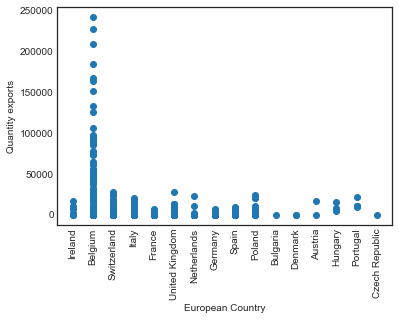

In [14]:
#Let get the values that will be used to determine the proportion, we can get these from the statistical quantity that each
#Country exported
eu_country_quantity = chocolate_df_europe['statisticalquantity']
eu_country_name = chocolate_df_europe['countryoforiginname']

plt.scatter(eu_country_name, eu_country_quantity, label='Country')
plt.xlabel("European Country")
plt.ylabel("Quantity exports")
plt.xticks(rotation=90)
plt.show()

#### We clearly see that majority of the imports over the 2010-2017 period are from Belgium reaching quantities almost as high as 250 000kg whereas all the other European countries highest imports were less than 5 times (< 50 000kg) the quantity that Belgium imported at its peak.

#### Considering the above, it would be interesting to know which year had the highest chocolate imports from Belgium. We can check that below

#### We clearly see that majority of the imports over the 2010-2017 period are from Belgium reaching quantities almost as high as 250 000kg whereas all the other European countries highest imports were less than 5 times (< 50 000kg) the quantity that Belgium imported at its peak.

#### Considering the above, it would be interesting to know which year had the highest chocolate imports from Belgium. We can check that below

In [16]:
#We can group the data according to country this time around instead of world region
chocolate_df_country = chocolate_df_europe.groupby('countryoforiginname')
#We then get the groups for 
chocolate_df_belgium = chocolate_df_country.get_group('Belgium')
chocolate_df_belgium

,districtofficename,countryoforiginname,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
1,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
20,Germiston/Alberton,Belgium,KG,0,Transport mode not specified (Unknown - Other),201002,2010,18062010 - Chocolate and sugar confectionery c...,4800.00,150008,EUROPE
28,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201002,2010,18062010 - Chocolate and sugar confectionery c...,26830.00,614965,EUROPE
47,Durban,Belgium,KG,0,Transport mode not specified (Unknown - Other),201004,2010,18062010 - Chocolate and sugar confectionery c...,61320.00,2049950,EUROPE
...,...,...,...,...,...,...,...,...,...,...,...
987,Cape Town Int Airport,Belgium,KG,4,Air,201410,2014,18062010 - Chocolate and sugar confectionery c...,66.00,25307,EUROPE
989,Johannesburg,Belgium,KG,1,Maritime,201410,2014,18062010 - Chocolate and sugar confectionery c...,3701.85,205622,EUROPE
990,O.R. Tambo Int Airport,Belgium,KG,4,Air,201410,2014,18062010 - Chocolate and sugar confectionery c...,2100.00,130241,EUROPE
997,Cape Town,Belgium,KG,1,Maritime,201411,2014,18062010 - Chocolate and sugar confectionery c...,51840.00,2328328,EUROPE


In [18]:
#Reference: https://www.geeksforgeeks.org/how-to-convert-integer-to-datetime-in-pandas-dataframe/#:~:text=Now%20to%20convert%20Integers%20to%20Datetime%20in%20Pandas,data%20type%20for%20the%20%E2%80%98Dates%E2%80%99%20column%20is%20Integer.
#We can convert the 'yearmonth' column to datetime64 dtype
chocolate_df_belgium['yearmonth'] = pd.to_datetime(chocolate_df_belgium['yearmonth'], format='%Y%m')


<ipython-input-18-d5baa3a781d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chocolate_df_belgium['yearmonth'] = pd.to_datetime(chocolate_df_belgium['yearmonth'], format='%Y%m')


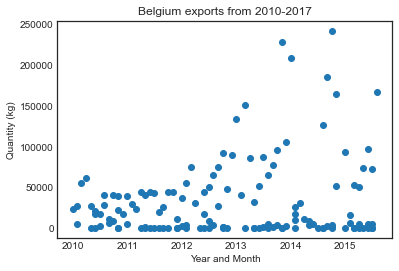

In [19]:
#Now that we have the records for Belgium, we can plot the year against the quantity imported (NOTE: Units for statistical
#quantity is kilograms)
x = chocolate_df_belgium['yearmonth']
y = chocolate_df_belgium['statisticalquantity']

plt.scatter(x, y, label='Belgium Imports')
plt.xlabel("Year and Month")
plt.ylabel("Quantity (kg)")
plt.title("Belgium exports from 2010-2017")
plt.show()

#### The scatter plot visualisation above shows that imports gradually increased over the 2010-2015 period. The highest import occurred between 2014 and 2015 and was almost 250 000 kg with the second highest being roughly 225 000 kg. What could be the reason for this increase in import quantity? Even though we see an increase in certain imports over time, we also notice that a number of imports remained below the 50 000 kg mark. A possible reason is that the demand for chocolate only increased in certain districts within South Africa and remained the same in other districts. Cape Town International Airport for example is unlikely to increase imports of chocolate as much as a Metropolitan such as Durban or Johannesburg. It is more likely that imports to Cape Town International Airport for example would remain the same (whilst the price is increased) since only a small percentage of the population (often times wealthier, affluent individuals) goes to the airport. So which particular district had the highest chocolate imports and which particular import had the highest customs value?

#### We can view the districts with the highest imports and highest customs values below by looking at the entire dataset (chocolate_df) instead of the grouped dataset (chocolste_df_belgium)

In [30]:
districts_label = chocolate_df['districtofficename'].value_counts().index
#Highest customs value is 12 082 071  
chocolate_df['customsvalue'].max() #Output: 12082071

#We can iterate through both customsvalue and districtofficename columns to find the district office name that
#corresponds to the maximum customs value
for value, district in zip(chocolate_df['customsvalue'],chocolate_df['districtofficename']):
    if value == 12082071:
        print(district)
#The district office with the highest customs value is Durban

Durban


#### Durban is found to be the district

In [ ]:
#### We clearly see that majority of the imports over the 2010-2017 period are from Belgium reaching quantities almost as high as 250 000kg whereas all the other European countries highest imports were less than 5 times (< 50 000kg) the quantity that Belgium imported at its peak.

#### Considering the above, it would be interesting to know which year had the highest chocolate imports from Belgium. We can check that below

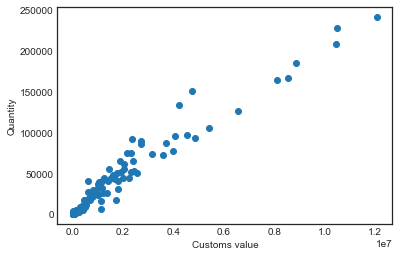

In [31]:
x = chocolate_df_belgium['customsvalue']
y = chocolate_df_belgium['statisticalquantity']

plt.scatter(x, y, label='Value')
plt.xlabel("Customs value")
plt.ylabel("Quantity")
plt.show()

#### We notice a direct proportionality between the quantity and the customs value meaning that the different imports (represented by dots in the above visualisation) were importing the same/similar quality chocolates (implying that chocolate prices were similar) which means that when the quantity is increased, it increases in proportion with the value, which is what we see in the visualisation above. If this were not the case and certain imports had much more expensive chocolates (higher quality) then we would expect to see points with higher customs value even at lower quantities (these points would lean towards the bottom right side of the graph/visualisation). The opposite would also be true, lower quality (cheaper) chocolate imports would appear towards the top left side of the graph. But we do not see that, therefore meaning that the quality of chocolate imports from Belgium, which accounts for majority of imports from Europe to South Africa, were for the most part similar throughtout the 2010 - 2017 period


#### We now want to visualise the columns 'transportcodedescription' and 'worldregion' to get a description of the form of transport used for imports in the various world regions included in the dataset. To do this I made use of networkx
#### Reference: Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008
#### website: https://networkx.org/documentation/latest/

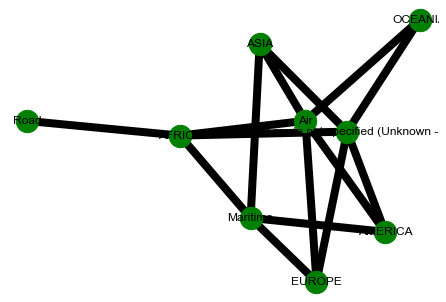

In [32]:
#Lets create a network graph
df = pd.DataFrame({'from':chocolate_df['transportcodedescription'], 'to': chocolate_df['worldregion']})
Graph = nx.from_pandas_edgelist(df, 'from','to')

#customize nodes by including labels, changing color and size
nx.draw(Graph, with_labels=True, node_color='green', node_size=500, width=8)
plt.show()

#### We readily notice that out of the world regions soecified, Africa is the only one that has 'Road' as one of its forms of transport for imports. This makes sense because South Africa is in Africa and road transport makes the most financial sense for imports. Europe for example only used air or maritime, this is most likely due to the large distance between South Africa and Europe. The same is true for America and Asia whereas Oceania only uses air.
#### Lastly we can compare three of our columns with each other to see how they varied throughout the entire period (2010-2017), to do this we will use Matplotlib 3D visualisation


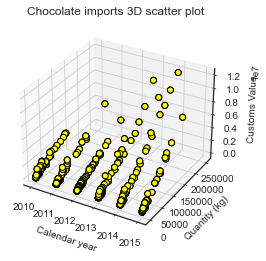

In [33]:
#Lets import the module that will be used for 3D visualisation
from mpl_toolkits.mplot3d import Axes3D


#gather our data
y1 = chocolate_df['calendaryear']
y2 = chocolate_df['statisticalquantity']
y3 = chocolate_df['customsvalue']

choc_data = (y1, y2, y3)
axes_labels = ('Year', 'Quantity', 'Customs')

#Generate 3D plot 
fig = plt.figure()
#Reference: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot and Hyperiond Data Science Level 2 Task 17 notes

#The int 111 denotes the position of the plot (see reference above)
ax = fig.add_subplot(111, projection='3d')

#Add data to the plot
for data, labels in zip(choc_data, axes_labels):
    #specify xyz
    x, y, z = choc_data
    #add data in the form of a scatterplot
    ax.scatter(x, y, z, alpha=1, c = 'yellow', edgecolors="black", s=35, label=labels)

#Addlabels
ax.set_xlabel("Calendar year")
ax.set_ylabel("Quantity (kg)")
ax.set_zlabel("Customs Value")
plt.title("Chocolate imports 3D scatter plot")
plt.show()

#### Having visualised a portion of the data from a 3 dimensional perspective, we get additional insights that we had not previously observed in our dataset. We previously observed a directly proportional relationship between the quantity of imports and the customs value of these imports. This 3d visualisation enables us to also see the year in which these imports took place. Why would this be important to know one may ask? Technically it is important because in order to predict the quantity of future imports (predictive analysis) it is important to look at how much has been imported in past years and which years have had the highest and or lowest imports. Having the data visualised in this format therefore gives a much better overall picture and indication of chocolate imports to South Africa. 

#### Lastly we use violinplots to finish off our visualisation.

<AxesSubplot:xlabel='worldregion', ylabel='statisticalquantity'>

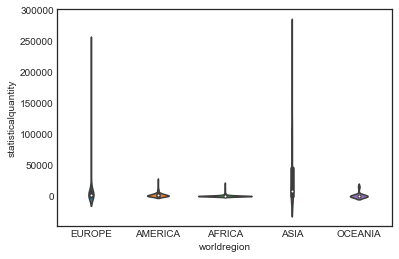

In [34]:
sns.violinplot(x ="worldregion", y ="statisticalquantity", data = chocolate_df, split = False)

#### Earlier we noticed that Europe had the highest count of imports (see horizontal bar graph), this was based on the number of imports that took place during the 2010-2017 period covered by this dataset. This consequently gave the impression that if we wanted to find out which world region imported the highest quantity (not number) of chocolates, it was more probable that this would be found in Europe since they had significantly more imports. However when we look at the above violinplot visualisation, we notice that the highest statistical quantity of chocolates imported actual took place in Asia and not Europe as initially thought. Though Europe did more imports than any other region and had, for the most part, the highest customs value of chocolates, it seems that highest individual quantity of chocolate imported actually came from Asia. 